In [3]:
import keras
from sklearn.datasets import fetch_california_housing # Fixed typo: changed 'dataset' to 'datasets'
from sklearn.model_selection import train_test_split # Fixed typo: changed 'train_test' to 'train_test_split'
from sklearn.preprocessing import StandardScaler

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
#cargar el conjunto de datos
housing= fetch_california_housing()

In [23]:

#crear conjunto de datos de entrenamiento, validacion y prueba

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

print('X_train', X_train.shape)
print('X_valid', X_valid.shape)
print('X_test', X_test.shape  )
print('y_train', y_train.shape)
print('y_valid', y_valid.shape)
print('y_test', y_test.shape)

X_train (11610, 8)
X_valid (3870, 8)
X_test (5160, 8)
y_train (11610,)
y_valid (3870,)
y_test (5160,)


In [27]:
# Escalar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_valid = scaler.transform(X_valid)

In [28]:
# crear el modelo de red neuronal:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

In [29]:
#compilar el modelo:
model.compile(loss="mean_squared_error", optimizer="sgd",
              metrics=[keras.metrics.RootMeanSquaredError(),'mean_absolute_percentage_error'])

In [30]:
#entrenar el modelo:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
363/363 [==============================] - 2s 4ms/step - loss: 1.2615 - root_mean_squared_error: 1.1231 - mean_absolute_percentage_error: 36.9054 - val_loss: 0.7045 - val_root_mean_squared_error: 0.8394 - val_mean_absolute_percentage_error: 30.3624
Epoch 2/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4478 - root_mean_squared_error: 0.6692 - mean_absolute_percentage_error: 28.3228 - val_loss: 0.4102 - val_root_mean_squared_error: 0.6404 - val_mean_absolute_percentage_error: 26.7469
Epoch 3/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4130 - root_mean_squared_error: 0.6426 - mean_absolute_percentage_error: 27.0018 - val_loss: 0.4079 - val_root_mean_squared_error: 0.6387 - val_mean_absolute_percentage_error: 27.9364
Epoch 4/10
363/363 [==============================] - 1s 3ms/step - loss: 0.3993 - root_mean_squared_error: 0.6319 - mean_absolute_percentage_error: 26.4664 - val_loss: 0.3837 - val_root_mean_squared_error: 0.6195 - val_

<Axes: >

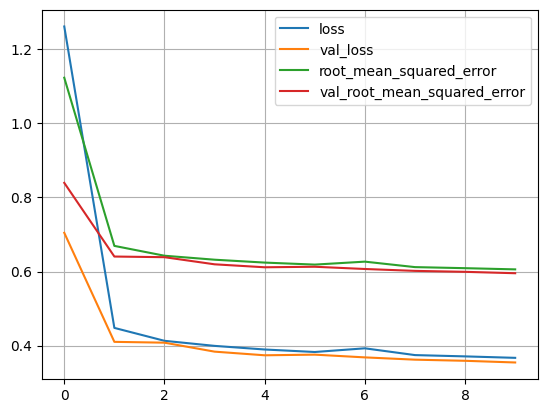

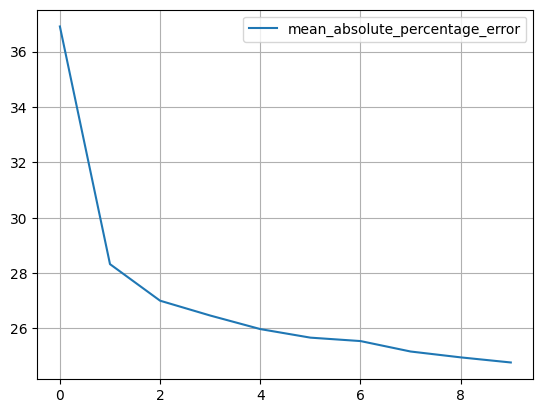

In [31]:
#graficar el historial de entrenamiento:
dfHistory = pd.DataFrame(history.history)
dfHistory[['loss','val_loss','root_mean_squared_error','val_root_mean_squared_error']].plot(grid=True) # Fixed typo: 'root_mean_squared_error'
dfHistory[['mean_absolute_percentage_error']].plot(grid=True)

In [32]:
# Evaluar el modelo en el conjunto de entrenamiento
loss,RMSE, MAPE = model.evaluate(X_train, y_train)
print("Evaluar el modelo en el conjunto de entrenamiento")
print("Loss train:", loss)
print("root_mean_squared_error train:", RMSE)
print("mean_absolute_percentage_error train:", MAPE)

363/363 [==============================] - 1s 2ms/step - loss: 0.3624 - root_mean_squared_error: 0.6020 - mean_absolute_percentage_error: 24.3544
Evaluar el modelo en el conjunto de entrenamiento
Loss train: 0.36238783597946167
root_mean_squared_error train: 0.6019865870475769
mean_absolute_percentage_error train: 24.3543758392334


In [33]:
# Evaluar el modelo en el conjunto de entrenamiento
loss,RMSE, MAPE = model.evaluate(X_valid, y_valid)
print("Evaluar el modelo en el conjunto de entrenamiento")
print("Loss train:", loss)
print("root_mean_squared_error train:", RMSE)
print("mean_absolute_percentage_error train:", MAPE)

121/121 [==============================] - 0s 3ms/step - loss: 0.3545 - root_mean_squared_error: 0.5954 - mean_absolute_percentage_error: 24.6484
Evaluar el modelo en el conjunto de entrenamiento
Loss train: 0.3544938266277313
root_mean_squared_error train: 0.5953938364982605
mean_absolute_percentage_error train: 24.648439407348633


In [34]:
# Evaluar el modelo en el conjunto de entrenamiento
loss,RMSE, MAPE = model.evaluate(X_test, y_test)
print("Evaluar el modelo en el conjunto de entrenamiento")
print("Loss train:", loss)
print("root_mean_squared_error train:", RMSE)
print("mean_absolute_percentage_error train:", MAPE)

162/162 [==============================] - 0s 2ms/step - loss: 0.3964 - root_mean_squared_error: 0.6296 - mean_absolute_percentage_error: 25.5648
Evaluar el modelo en el conjunto de entrenamiento
Loss train: 0.39638784527778625
root_mean_squared_error train: 0.6295933723449707
mean_absolute_percentage_error train: 25.56479835510254
